<a href="https://colab.research.google.com/github/johyunkang/adp_certificate/blob/main/ADP_27%ED%9A%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ADP 27회 실기
## 머신러닝 파트
### 1번 데이터 확인 및 전처리

In [ ]:
# pip intall seaborn
# pip install matplotlib
# pip install scikit-learn

     |████████████████████████████████| 9.8 MB 584 kB/s eta 0:00:01
     |████████████████████████████████| 297 kB 1.6 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd

df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/27/problem1.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,Amount,Class
0,60.0,1.069141,0.043786,0.309867,1.316694,-0.462394,-0.857888,0.207904,-0.191270,0.056398,0.041567,-0.507358,-0.108666,-0.473257,0.452046,1.005675,0.185441,-0.439976,89.40,0
1,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,0.00,1
2,426.0,-1.932055,1.724618,1.288229,-0.396998,-0.140202,2.470521,-1.865298,-5.186855,0.794764,0.155379,0.034517,0.906738,-0.027172,-0.404303,-0.473949,0.274034,-0.222340,16.19,0
3,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,529.00,1
4,674.0,-0.719065,0.638954,0.686335,-0.023240,2.317890,3.871978,-0.312797,1.089780,-0.596925,-0.006142,-0.242883,-0.384491,0.109079,0.187565,1.823472,0.274346,-0.697730,22.00,0


#### 1-1. EDA 데이터 탐색 시각화

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings(action='ignore')

display(df.describe())
print('\n\n')
print( ' ' 
    , '데이터 컬럼 정보'
    , df.info()
    , '====== 결측치 체크 ========'
    , df.isna().sum()
    , '\n=====불균형 확인 ======='
    , df[['Class']].value_counts()
    , '==========================='
    , ' '
    , sep = '\n'
     )

print('데이터 불균형 확인')
print(df[['Class']].value_counts())




,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,Amount,Class
count,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.00000,1193.000000
mean,91514.485331,-0.755027,0.543730,-1.148224,0.777816,-0.409181,-0.283953,-0.852545,0.145026,-0.446390,-0.904275,0.656342,-1.014185,0.011973,-1.168346,0.019232,-0.629529,-1.070657,88.88570,0.167645
std,47896.081947,3.622262,2.663928,3.908787,2.345566,2.702077,1.507579,3.396565,2.471559,1.664075,2.902608,1.957200,2.996734,1.013383,3.230613,0.908008,2.269400,3.812768,220.14133,0.373707
min,60.000000,-30.552380,-33.644637,-31.103685,-4.294888,-22.105532,-10.886820,-37.060311,-37.353443,-11.126624,-23.228255,-2.651584,-17.228662,-2.800154,-18.493773,-4.498945,-14.129855,-25.162799,0.00000,0.000000
25%,50265.000000,-1.302600,-0.435358,-1.609339,-0.610310,-0.842184,-1.017863,-0.806043,-0.219328,-1.039740,-0.883807,-0.601391,-0.967306,-0.692559,-0.950226,-0.549590,-0.701499,-0.682272,3.54000,0.000000
50%,81797.000000,-0.302521,0.231973,-0.234204,0.327567,-0.073622,-0.379633,-0.084983,0.073036,-0.210455,-0.226471,0.283080,-0.014046,0.023014,-0.099055,0.046894,-0.055831,-0.152578,20.99000,0.000000
75%,136995.000000,1.249960,1.112040,0.811507,1.335332,0.684224,0.302350,0.464553,0.454794,0.452561,0.287274,1.212163,0.512121,0.699744,0.419194,0.660619,0.458139,0.368286,77.49000,0.000000
max,172676.000000,2.320621,19.167239,3.324665,12.114672,15.275762,6.268481,8.123589,20.007208,5.916809,7.135948,11.669205,3.106650,3.068228,3.886382,2.869424,3.139656,6.739384,3335.73000,1.000000





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1193 entries, 0 to 1192
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    1193 non-null   float64
 1   V1      1193 non-null   float64
 2   V2      1193 non-null   float64
 3   V3      1193 non-null   float64
 4   V4      1193 non-null   float64
 5   V5      1193 non-null   float64
 6   V6      1193 non-null   float64
 7   V7      1193 non-null   float64
 8   V8      1193 non-null   float64
 9   V9      1193 non-null   float64
 10  V10     1193 non-null   float64
 11  V11     1193 non-null   float64
 12  V12     1193 non-null   float64
 13  V13     1193 non-null   float64
 14  V14     1193 non-null   float64
 15  V15     1193 non-null   float64
 16  V16     1193 non-null   float64
 17  V17     1193 non-null   float64
 18  Amount  1193 non-null   float64
 19  Class   1193 non-null   int64  
dtypes: float64(19), int64(1)
memory usage: 186.5 KB
 
데이터 컬럼 정보
None
======

- 데이터 전체 컬럼은 float 및 int 형이다
- 결측치 데이터는 존재하지 않는다.

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt

# plt.figure(figsize=(20, 20))
# sns.pairplot(df, hue='Class', corner=True)

#### 1-2 변수간 상관관계를 시각화하고 전처리가 필요함을 설명하라

<Axes: >

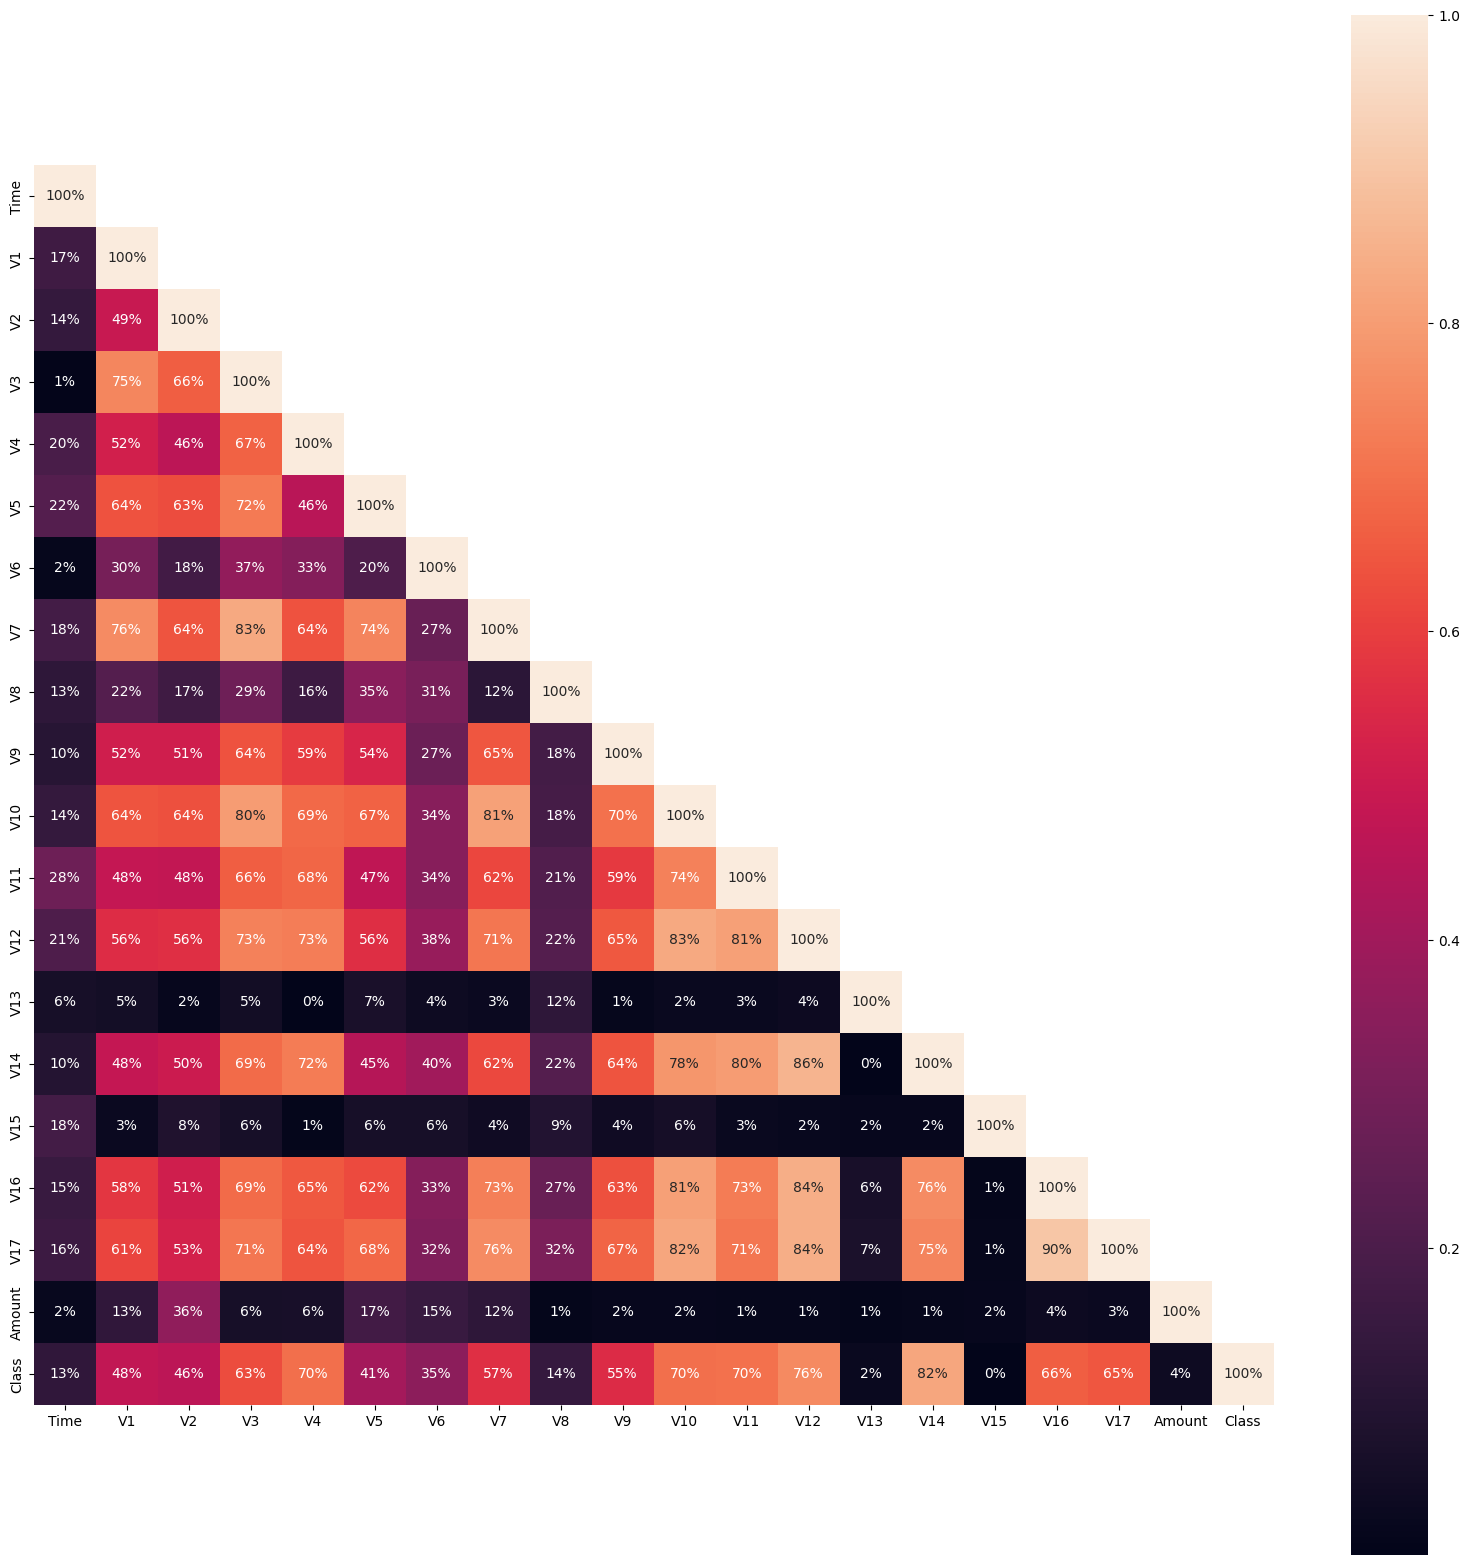

In [ ]:
plt.figure(figsize=(20,20))

# corr matrix 생성
corr_matrix = df.corr().abs()
# 상 삼각행렬 생성
up_mask = np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_)

# 상관계수가 0.8 보다 큰 특성 열의 인덱스 찾기
# to_drop = [column for column in up_mask.columns if any(up_mask[column] >= 0.8)]
sns.heatmap(corr_matrix, mask=up_mask, annot=True, fmt='.0%', square=True)

# for col in df.columns :
#     if(up_mask[col] > 0.8) :
#         print('col:', col)

In [ ]:
corr_unstack = corr_matrix.unstack()
# corr_unstack
df_cor = pd.DataFrame(corr_unstack[corr_unstack < 1].sort_values(ascending=False), columns=['corr'])
df_cor.style.background_gradient(cmap='viridis')

- 변수별 상관관계 확인을 위한 Heatmap 그래프 확인
- 변수별 상관관계가 높은 컬럼(상관관계 절대값 85% 이상)은 아래와 같다.
    - V17, V16, V12, V14, V3, V7

- 많은 변수가 상관관계가 높아 다중공선성 문제가 있기에, 차원축소 등의 작업을 통한 차원축소 작업이 필요하다.

i: 0 , name: V1 0 0
i: 1 , name: V2 0 1
i: 2 , name: V3 0 2
i: 3 , name: V4 1 0
i: 4 , name: V5 1 1
i: 5 , name: V6 1 2
i: 6 , name: V7 2 0
i: 7 , name: V8 2 1
i: 8 , name: V9 2 2
i: 9 , name: V10 3 0
i: 10 , name: V11 3 1
i: 11 , name: V12 3 2
i: 12 , name: V13 4 0
i: 13 , name: V14 4 1
i: 14 , name: V15 4 2
i: 15 , name: V16 5 0
i: 16 , name: V17 5 1
i: 17 , name: Amount 5 2


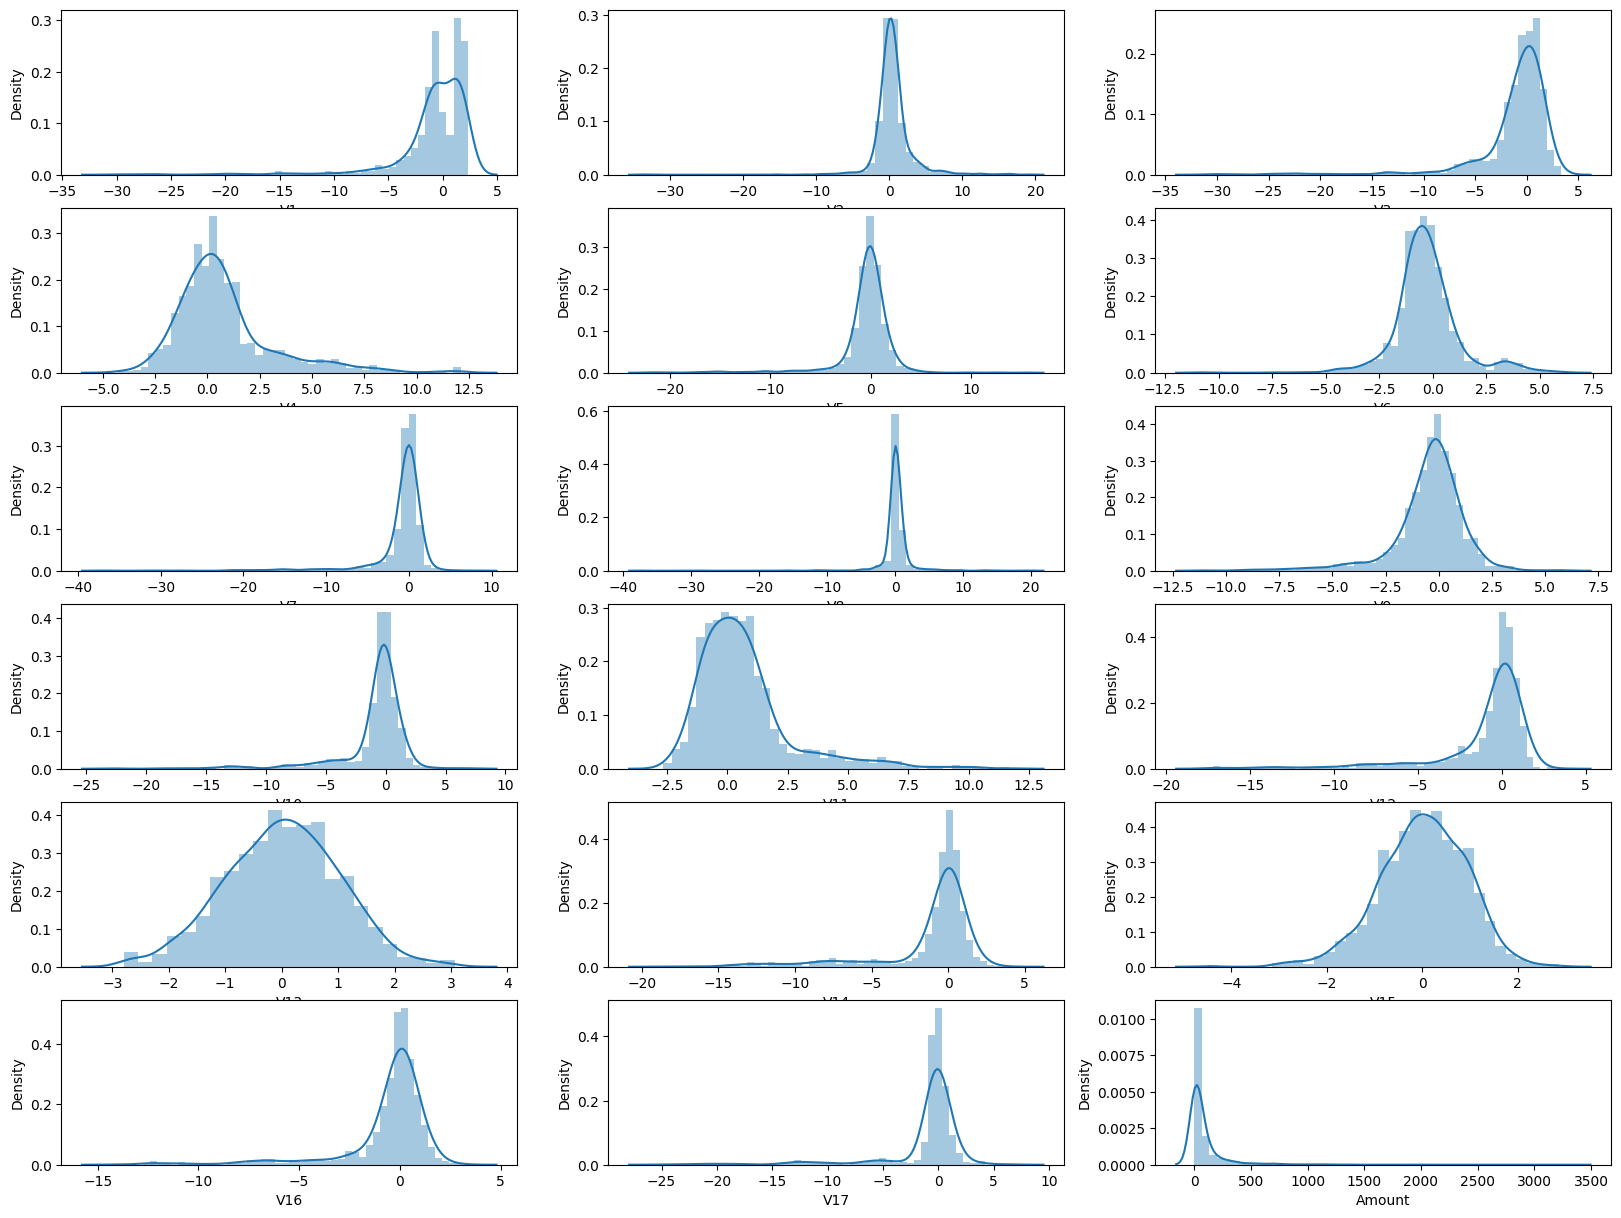

In [ ]:
col_names = df.columns[1:-1]

fig, ax = plt.subplots(nrows=6, ncols=3, figsize=(20, 15))
for idx in range(len(col_names)) : 
    import math
    r = math.trunc(idx / 3)
    c = idx % 3
    min_val = df[col_names[idx]].min()
    max_val = df[col_names[idx]].max()
    term_val = math.trunc((max_val - min_val) / 10)
    print('i:', idx, ', name:', col_names[idx], r, c)
    
    sns.distplot(df[col_names[idx]], ax=ax[r, c])
    
    
    
#     sns.jointplot(df, x=name, y='Class')

- 금액(Amout) 컬럼은 대부분의 값이 500 이하에 분포되어 있다.
- 신용카드 결제 대부분의 금액은 500 이하이다.

### 2번 차원축소 (1번 이어서)
#### 2-1 차원축소 방법 2가지 이상 비교하고 한 가지 선택

차원축소 방법은 아래와 같은 방법이 있다.
1. PCA (주성분분석) : 여러 변수 간에 존재하는 상관관계를 이용해 이를 대표하는 주성분을 추출해 차원을 축소
    - 선형적인 데이터에 올바른 차원축소
    - 데이터에서 분산이 최대힌 성분 축에 관심이 있음
    - 장점
        - 기존 데이터의 정보 유실이 최소화
        - 원본 데이터의 피처 개수에 비해 매우 작은 주성분으로 원본 데이터의 총 변동성을 대부분 설명 가능
2. KernelPCA (커널PCA) : 주성분 분석의 확장을 사용하여 비선형 차원 축소
    - 비선형 데이터에 대한 차원축소 방법
3. LDA (선형판별분석) : 클래스를 최대한 분리하는 성분 축으로 특성을 투영
    - 특성 공간을 저차원으로 투영한다는 점에서 주성분분석(PCA)와 비슷함
    - 클래스 간의 차이를 최대화하는 추가적인 목적을 가짐
4. TSVD : 희소한 특성 행렬의 차원을 축소시 유익함
    - PCA와 비슷하나, PCA와 달리 희소 특성 행렬에 사용 가능

#### 2-2 추천한 한 가지를 실제로 수행하고 선택한 이유 설명

In [ ]:
# 데이터 손실이 가장 적고 널리 사용되는 PCA를 이용하여 차원축소 수행
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


X = df.drop('Class', axis=1)
y = df['Class']
X.head()

# 상관관계가 높았던 피처
cols_name = ['V17', 'V16', 'V12', 'V14', 'V3', 'V7'] 

# StandardScaler 적용
scaler = StandardScaler()
# df_scaled = scaler.fit_transform(X[cols_name])
# df_scaled = scaler.fit_transform(X)
pca = PCA(n_components=5)
pca.fit(df_scaled)
print('PCA Component별 변동성:', pca.explained_variance_ratio_)

PCA Component별 변동성: [0.48856528 0.06877926 0.06740491 0.06068848 0.05897547]


In [ ]:
def scree_plot(pca) :
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
    
    ax = plt.subplot()
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals, color='red')
    
    for i in range(num_components) :
        ax.annotate(r"%s" % ((str(vals[i] * 100)[:3])), (ind[i], vals[i]), va="bottom"
                   , ha='center', fontsize=13)
        
        ax.set_xlabel("PC")
        ax.set_ylabel('Variance')
        plt.title('scree plot')
    scree_plot(pca)